In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df = pd.read_csv(r"train_energy_data.csv")
df

,BuildingType,SquareFootage,NumberofOccupants,AppliancesUsed,AverageTemperature,DayofWeek,EnergyConsumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


In [9]:
df.BuildingType=df.BuildingType.astype('category').cat.codes
df.DayofWeek=df.DayofWeek.astype('category').cat.codes

In [10]:
df.dtypes

BuildingType             int8
SquareFootage           int64
NumberofOccupants       int64
AppliancesUsed          int64
AverageTemperature    float64
DayofWeek                int8
EnergyConsumption     float64
dtype: object

In [27]:
df

,BuildingType,SquareFootage,NumberofOccupants,AppliancesUsed,AverageTemperature,DayofWeek,EnergyConsumption
0,2,7063,76,10,29.84,0,2713.95
1,0,44372,66,45,16.72,0,5744.99
2,1,19255,37,17,14.30,1,4101.24
3,2,13265,14,41,32.82,0,3009.14
4,0,13375,26,18,11.92,0,3279.17
...,...,...,...,...,...,...,...
995,2,14419,68,44,23.95,1,3661.21
996,1,12194,7,22,14.67,1,3546.34
997,0,39562,88,20,32.18,0,5147.21
998,2,8348,67,37,16.48,1,3244.98


In [11]:
#checking null values
dfresult=df.dropna()
print(dfresult)
df.isnull().sum()

     BuildingType  SquareFootage  NumberofOccupants  AppliancesUsed  \
0               2           7063                 76              10   
1               0          44372                 66              45   
2               1          19255                 37              17   
3               2          13265                 14              41   
4               0          13375                 26              18   
..            ...            ...                ...             ...   
995             2          14419                 68              44   
996             1          12194                  7              22   
997             0          39562                 88              20   
998             2           8348                 67              37   
999             0          15813                 57              11   

     AverageTemperature  DayofWeek  EnergyConsumption  
0                 29.84          0            2713.95  
1                 16.72          0 

BuildingType          0
SquareFootage         0
NumberofOccupants     0
AppliancesUsed        0
AverageTemperature    0
DayofWeek             0
EnergyConsumption     0
dtype: int64

In [12]:
#checking duplicates
print(df.duplicated())
df=df.drop_duplicates()
df.duplicated().sum()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


0

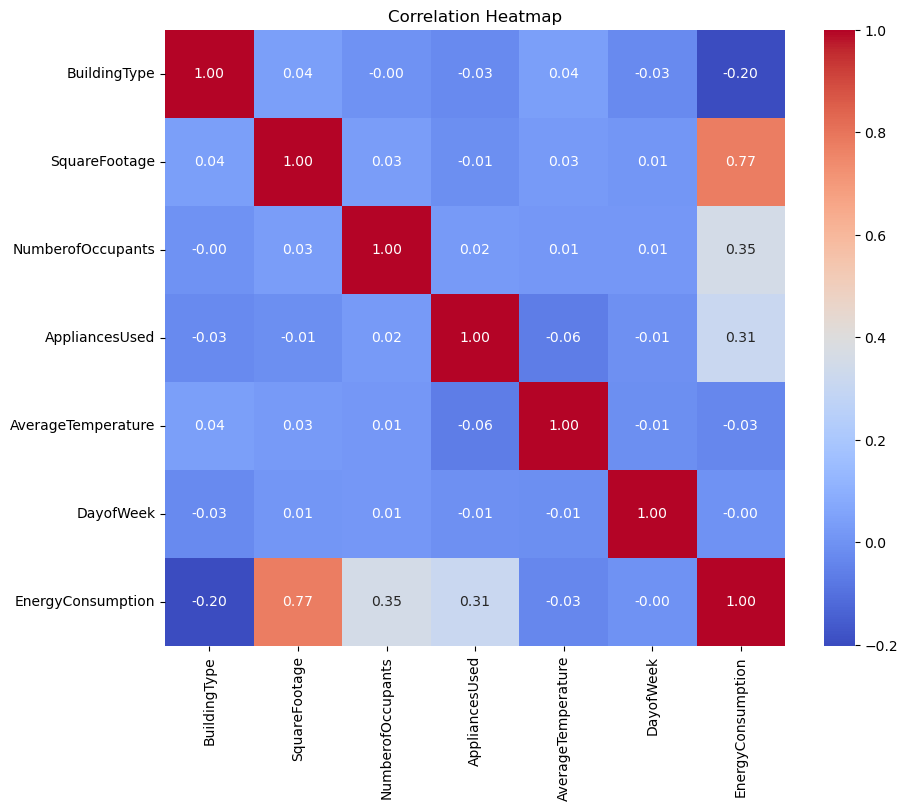

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

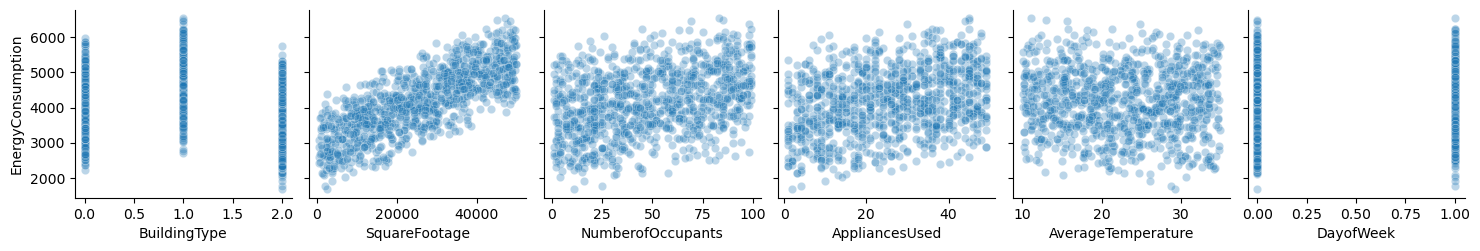

In [26]:
# Get numeric attribute names and drop the target variable
num_atts = df.columns
target_variable = 'EnergyConsumption'
num_atts = num_atts.drop(target_variable)


# Create a list with the target variable at the start and then the rest of the attributes
vars_for_pairplot = list(num_atts)
vars_for_pairplot.insert(0, target_variable)

# Create the pair plot
sns.pairplot(df[vars_for_pairplot],
             y_vars = [target_variable], # Plot only target variable on y-axis
             x_vars = list(num_atts), # Plot all others in x-axis
             kind='scatter',
             plot_kws={'alpha': 0.3}
            )

plt.show()

In [16]:
X = df.drop('EnergyConsumption', axis=1)
y = df['EnergyConsumption']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
rsq = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {rsq:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 126059.23
R-squared (R2): 0.85
Root Mean Squared Error (RMSE): 355.05


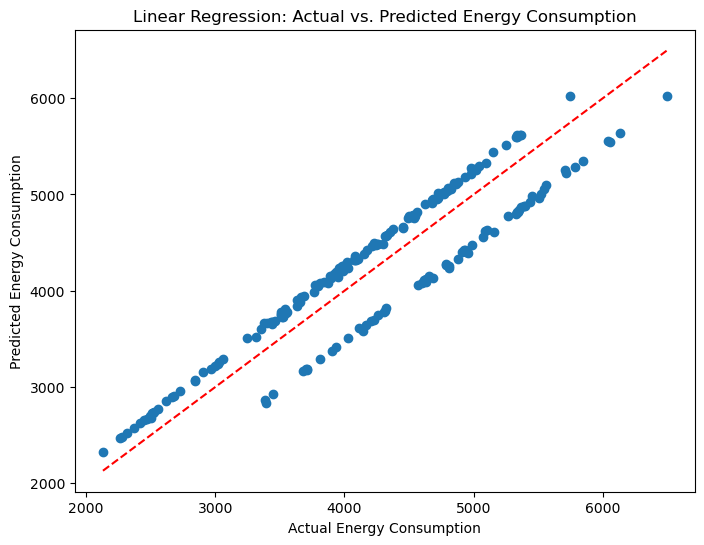

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Linear Regression: Actual vs. Predicted Energy Consumption')
plt.show()